# 1. Input

In [ ]:
input()

Ini adalah contoh output


'Ini adalah contoh output'

In [ ]:
input("Masukkan nama kamu: ")

Masukkan nama kamu: Christian Yu


'Christian Yu'

In [ ]:
nilai_2 = input("Masukkan nilai kamu: ")

Masukkan nilai kamu: 100


In [ ]:
print(nilai_2)

100


In [ ]:
type(nilai_2)

str

Ubah tipe data 100 jadi integer

In [ ]:
nilai_2 = int(input("Masukkan nilai kamu: "))

Masukkan nilai kamu: 100


In [ ]:
type(nilai_2)

int

In [ ]:
nama1 = "Christian Yu"
nama2 = "Jackson Wang"

In [ ]:
nama1

'Christian Yu'

In [ ]:
nama2

'Jackson Wang'

# 2. Conditional

In [ ]:
nilai = float(input("Masukkan nilai kamu: "))

Masukkan nilai kamu: 74.9


In [ ]:
if nilai > 90:
  print("Nilai kamu A")
elif nilai >= 75:
  print("Nilai kamu B")
elif nilai >= 50:
  print("Nilai kamu C")
else:
  print("Nilai kamu D")

Nilai kamu C


**EXERCISE**
1.	Buat program yang menerima input dari user berupa suhu dalam Celcius. Ketika angka dimasukkan, program akan mengonversi nilai suhu menjadi Fahrenheit.

In [20]:
suhu_c = float(input("Masukkan suhu dalam Celcius: "))

Masukkan suhu dalam Celcius: 0


In [21]:
# Konversi ke Celcius
suhu_f = (suhu_c*9/5)+32
print(suhu_f)

32.0


2.	Buat program yang akan mencetak output berdasarkan suhu Fahrenheit di poin pertama :
•	Jika suhu Fahrenheit di atas 150, maka print “Sekarang suhunya panas”
•	Jika suhu Fahrenheit di atas 100, maka print “Sekarang suhunya normal”
•	Jika suhu Fahrenheit selain nilai di atas, maka print “Sekarang suhunya dingin”


In [22]:
if suhu_f > 150:
  print("Sekarang suhunya panas")
elif suhu_f > 100:
  print("Sekarang suhunya normal")
else:
  print("Sekarang suhunya dingin")

Sekarang suhunya dingin


# ** DATA TYPES AND STRUCTURE**

```
# This is formatted as code
```



Akan membangun model ML berupa klasifikasi (supervised model) dari data load_wine pada toy dataset yang diperoleh dari https://scikit-learn.org/1.5/datasets/toy_dataset.html

# 1. Read Dataset

In [3]:
import pandas as pd
from sklearn import datasets

# Memuat dataset Wine dari scikit-learn dan mengonversinya menjadi Dataframe
wine = datasets.load_wine()
x = wine.data #input untuk ML
y = wine.target #output yang diinginkan

# Mengonversi data fitur dan target menjadi DataFrame
df_x = pd.DataFrame(x, columns = wine.feature_names)
df_y = pd.Series(y, name='target')

# Gabungkan fitur (kolom-kolom) dan target dalam suatu DataFrame
df = pd.concat([df_x, df_y], axis = 1)

df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
# Mengakses kolom 'target' yg unique
df['target'].unique()

array([0, 1, 2])

In [7]:
# Statistik Deskriptif
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [10]:
# Cari modus kolom 'alcohol'
df['alcohol'].mode()

,alcohol
0,12.37
1,13.05


# 2. Split Data

Memisahkan variabel prediktor dan variabel target

In [11]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 42)
# x_train : data prediktor yang akan ditraining
# x_test : data prediktor yang akan ditest setelah ditraining
# y_train : data target (hasil prediksi) yang akan ditraining berdasarkan x_train
# y_test : data target yang akan ditest/dibandingkan setelah ditraining (kunci jawaban)
# test_size = 0.2 artinya data yang akan ditest adalah 20% dari jumlah row. biasanya 80% untuk train, 20% untuk test
# random_state maksudnya ngambil 20% nya acak, ga dari atas/bawah/tengah. 42 nya bebas aja

# 3. Train the Model

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier(random_state = 42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

# 4. Predict & Evaluate

In [13]:
from sklearn.metrics import accuracy_score

# Prediksi dan Evaluasi
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Laporan Klasifikasi:")
print(f"Akurasi: {accuracy*100:.2f}%") # :.2f artinya hasilnya pengen 2 desimal, f nya itu float

Laporan Klasifikasi:
Akurasi: 94.44%


Hasil akurasinya sudah cukup baik, artinya tidak perlu dilakukan hyperparameter tuning

5. Visualisasi

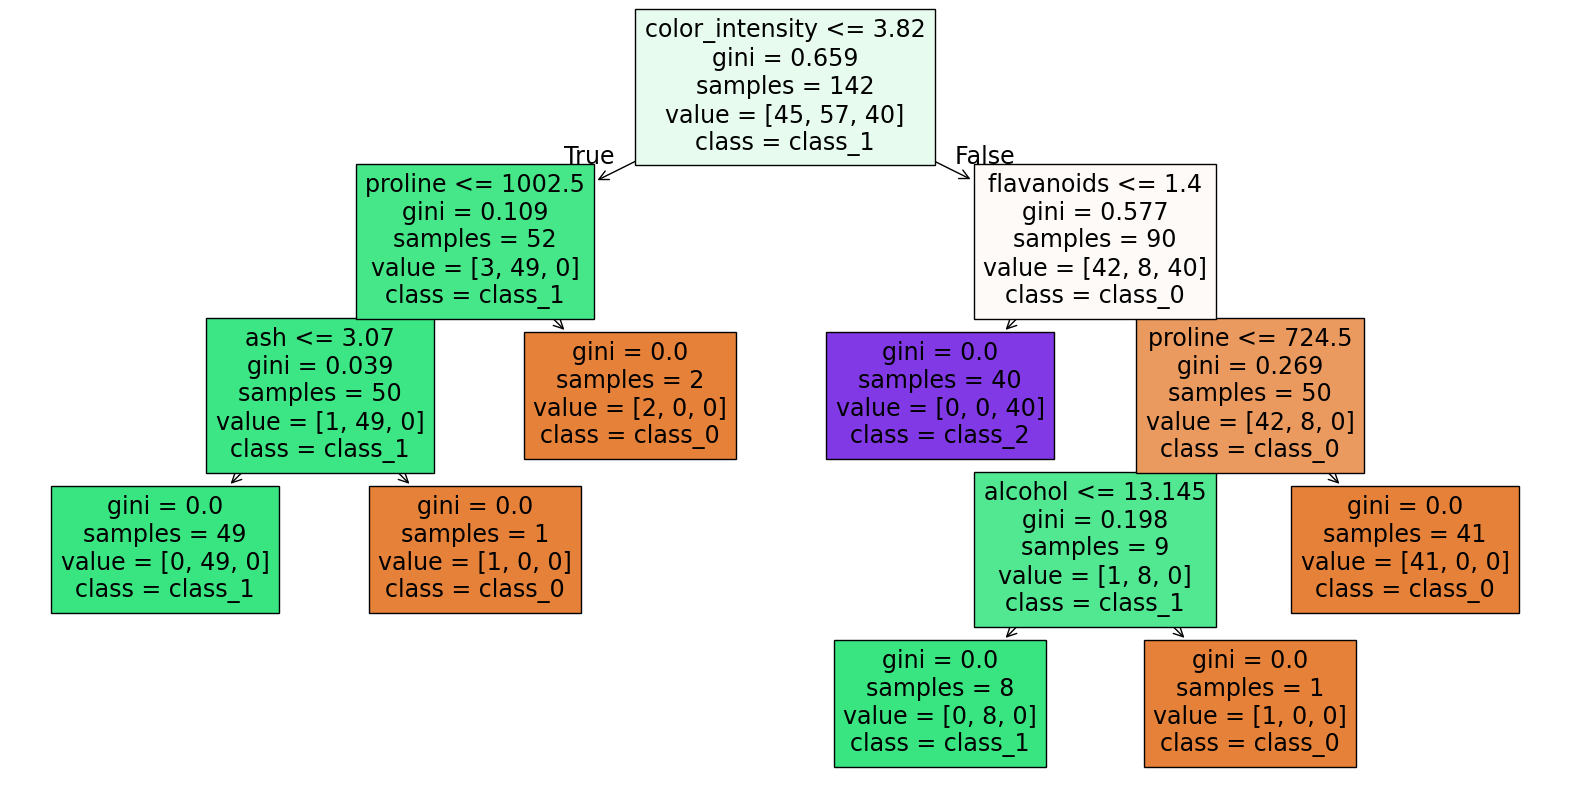

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualisasi decision tree (optional)
plt.figure(figsize = (20,10))
tree.plot_tree(model,
               feature_names = wine.feature_names,
               class_names = wine.target_names,
               filled = True)
plt.show()